# NYU CUSP PUI2016
# Assignment 1 

In [1]:
from __future__ import print_function
__author__= 'Dongjie Fan'

import numpy as np
import pylab as pl
from scipy.optimize import curve_fit, minimize
from scipy import stats

# import seaborn
%pylab inline

np.random.seed(4321)

Populating the interactive namespace from numpy and matplotlib


In [2]:
distributions = ['pois', 'gaus', 'chisq', 'binomial', 'exp']
md = {}

##  1.Chisq

In [3]:
# Population Mean
mymean = 10
# degree of freedom in Chisq distribution
df = mymean

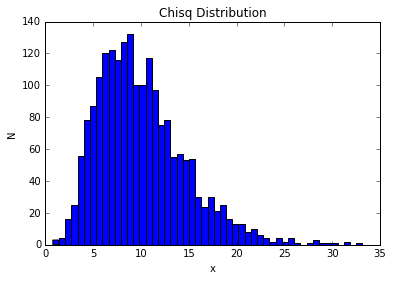

In [4]:
md['chisq'] = np.random.chisquare(df, size=2000)
pl.hist(md['chisq'], bins = 50)
pl.title("Chisq Distribution")
pl.xlabel("x")
pl.ylabel("N")

### Fig1.1: Chisq Distribution with df = 10, N = 2000

In [5]:
print ('Chisq mean: {:.2f}, std: {:.2f}'.format(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 10.04, std: 4.63


In [6]:
md['chisq'] = {}

#### 1. use np.random.choice( )

In [7]:
# size100 = np.random.choice(range(10,2001), replace=False, size=100)

#### 2. another method to select size100 to better viz

In [8]:
# size70 = np.random.choice(range(10,100), replace=False, size=70)
# size20 = np.random.choice(range(100,500), replace=False, size=20)
# size8 = np.random.choice(range(500,1000), replace=False, size=8)
# size2 = np.random.choice(range(1000,2001), replace=False, size=2)
# size100 = np.concatenate((size2, size8, size20, size70))

#### 3.Instruction Method  

In [9]:
size100 = (2000 / (np.array(range(1, 100)))).astype(int)

<br/>

In [10]:
for size in size100:
    md['chisq'][size] = np.random.chisquare(df, size = size)

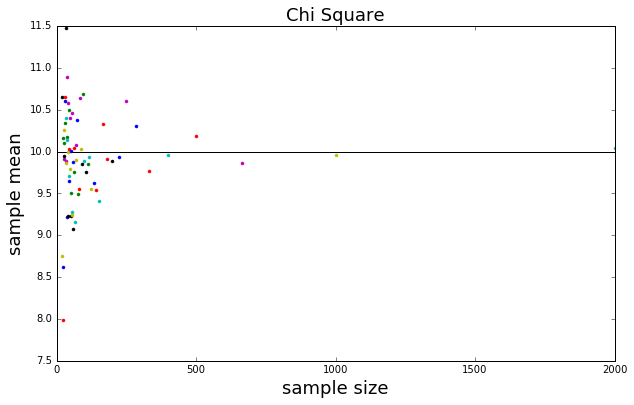

In [11]:
# save the mean
md['chisq']['means'] = {}
fig_chisq = pl.figure(figsize=(10,6)).add_subplot(111)
fig_chisq.set_ylabel('sample mean', fontsize=18)
fig_chisq.set_xlabel('sample size', fontsize=18)
fig_chisq.set_title('Chi Square', fontsize=18)
fig_chisq.plot([0, 2000], [df, df], 'k')
        
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #plot
        fig_chisq.plot(nn, md['chisq']['means'][nn], '.')
        #fig_chisq.set_ylim(min(md['chisq']['means']), max(md['chisq']['means']))

### Fig1.2:  As sample size increases, the sample mean is much more likely to be close to the population mean, with the precision increasing. It fits the core of Law of Large Number (LLN) Theorem


In [12]:
allmeans = list(md['chisq']['means'].values())

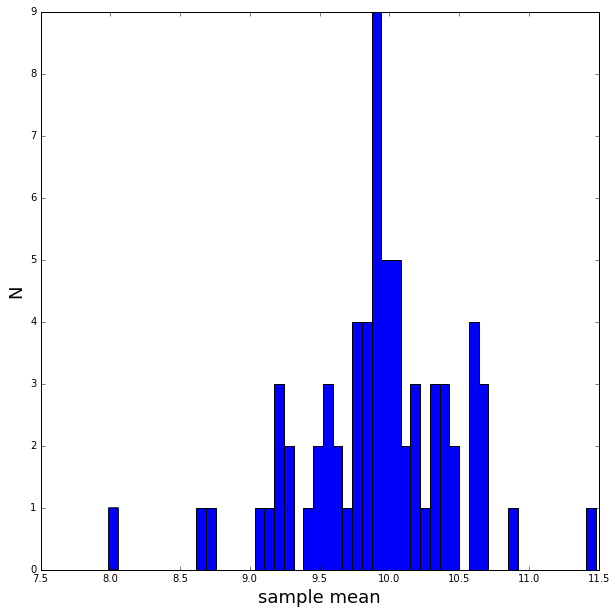

In [13]:
pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 50)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Fig1.3: The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger. In this plot, 'bell-shape' histogram of 'sample mean' shows the core of Central Limit Theorem.

<br/>
<br/>

## Exponential Distribution

In [14]:
# Population Mean
mymean = 10
# parameter lambda (la) in exponential distribution
la = 1.0/mymean
scale = 1.0/la
print ("lambda = {} and scale = 1/lambda = {}".format(la, scale) )

lambda = 0.1 and scale = 1/lambda = 10.0


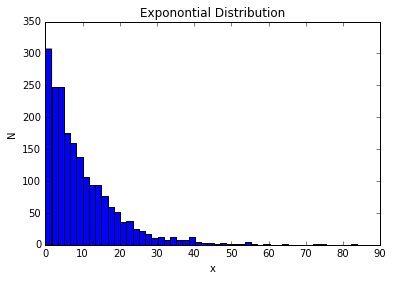

In [15]:
md['exp'] = np.random.exponential(scale=scale, size=2000)
pl.hist(md['exp'], bins = 50)
pl.title("Exponontial Distribution")
pl.xlabel("x")
pl.ylabel("N")

### Fig2.1: Exponential Distribution with lambda = 0.1, N = 2000

In [16]:
print ('exponential mean: {:.2f}, std: {:.2f}'.format(md['exp'].mean(), md['exp'].std()))

exponential mean: 9.84, std: 9.84


In [17]:
md['exp'] = {}

In [18]:
# Random
# size70 = np.random.choice(range(10,100), replace=False, size=70)
# size20 = np.random.choice(range(100,500), replace=False, size=20)
# size8 = np.random.choice(range(500,1000), replace=False, size=8)
# size2 = np.random.choice(range(1000,2001), replace=False, size=2)
# size100 = np.concatenate((size2, size8, size20, size70))

#### or

In [19]:
size100 = (2000 / (np.array(range(1, 100)))).astype(int)

<br/>

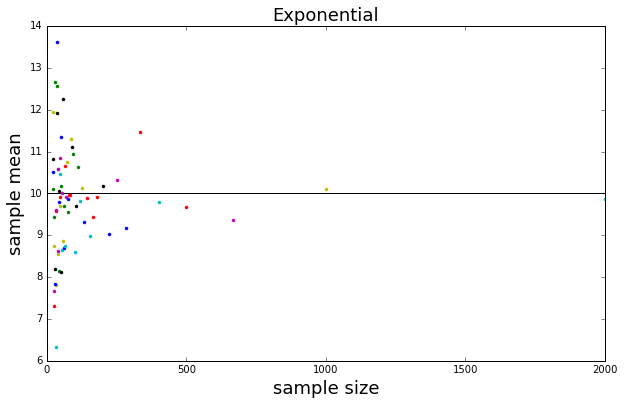

In [20]:
for size in size100:
    md['exp'][size] = np.random.exponential(scale, size = size)
md['exp']['means'] = {}
fig = pl.figure(figsize=(10,6)).add_subplot(111)
fig.set_ylabel('sample mean', fontsize=18)
fig.set_xlabel('sample size', fontsize=18)
fig.set_title('Exponential', fontsize=18)
fig.plot([0, 2000], [df, df], 'k')
for nn in md['exp']:
    if not type(nn) == str:
        md['exp']['means'][nn] = md['exp'][nn].mean()
        #plot
        fig.plot(nn, md['exp']['means'][nn], '.')

### Fig2.2:  As sample size increases, the sample mean is much more likely to be close to the population mean, with the precision increasing. It fits the core of Law of Large Number (LLN) Theorem

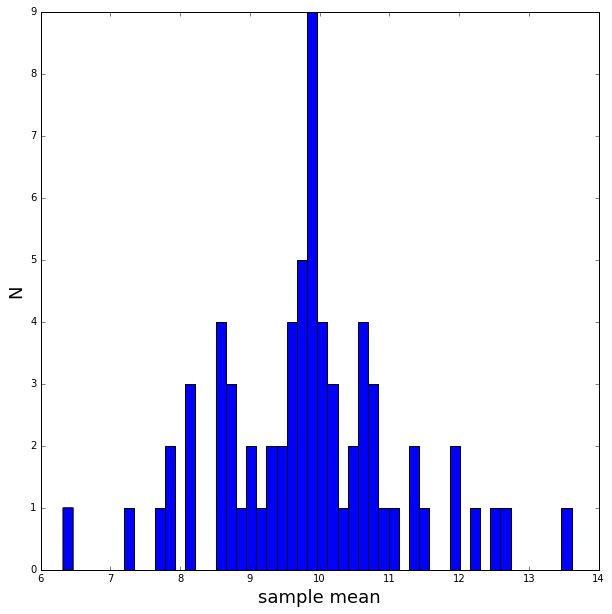

In [21]:
allmeans = list(md['exp']['means'].values())
pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 50)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Fig2.3: The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger. In this plot, 'bell-shape' histogram of 'sample mean' shows the core of Central Limit Theorem.

<br/>
<br/>

## 3. Poisson Distribution

lambda = 10
pois mean: 10.02, std: 3.25


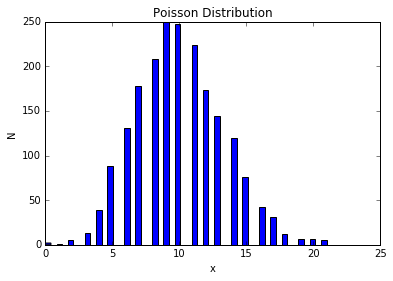

In [22]:
# Population Mean
mymean = 10
# parameter lambda (la) in pois distribution
la = mymean
print ("lambda = {}".format(la) )

md['pois'] = np.random.poisson(lam = la, size=2000)
pl.hist(md['pois'], bins = 50)
pl.title("Poisson Distribution")
pl.xlabel("x")
pl.ylabel("N")

print ('pois mean: {:.2f}, std: {:.2f}'.format(md['pois'].mean(), md['pois'].std()))

### Fig3.1: Poisson Distribution with lambda = 10, N = 2000

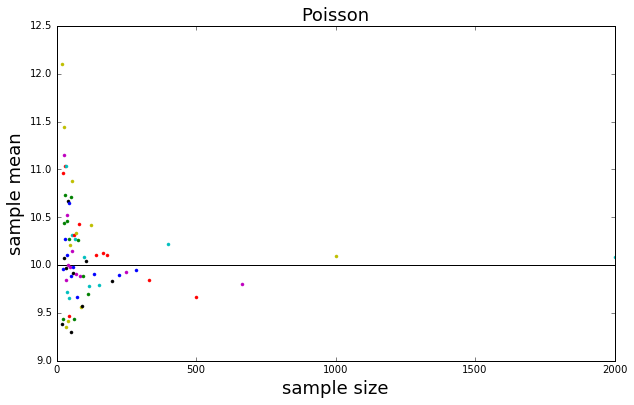

In [23]:

md['pois'] = {}
size100 = (2000 / (np.array(range(1, 100)))).astype(int)

for size in size100:
    md['pois'][size] = np.random.poisson(lam = la, size = size)
md['pois']['means'] = {}
fig = pl.figure(figsize=(10,6)).add_subplot(111)
fig.set_ylabel('sample mean', fontsize=18)
fig.set_xlabel('sample size', fontsize=18)
fig.set_title('Poisson', fontsize=18)
fig.plot([0, 2000], [df, df], 'k')
for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #plot
        fig.plot(nn, md['pois']['means'][nn], '.')

### Fig3.2:  As sample size increases, the sample mean is much more likely to be close to the population mean, with the precision increasing. It fits the core of Law of Large Number (LLN) Theorem

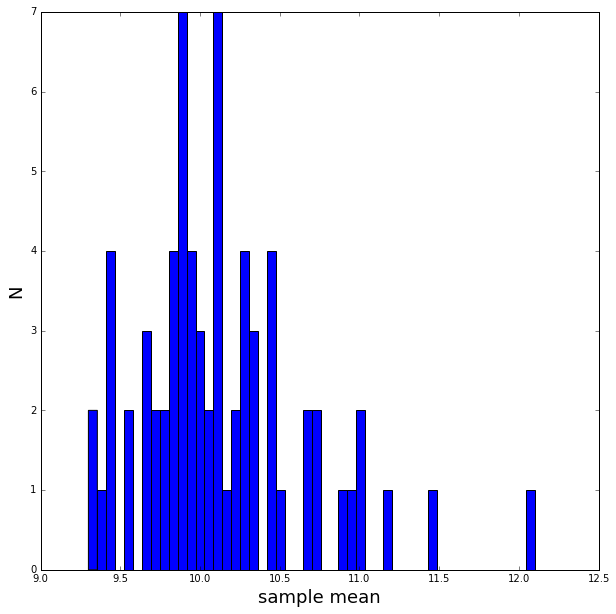

In [24]:
allmeans = list(md['pois']['means'].values())
pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 50)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Fig3.3:  The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger. In this plot, 'bell-shape' histogram of 'sample mean' shows the core of Central Limit Theorem.

<br/>
<br/>


## 4. Normal Distribution

mean = 10 and std = 1.0
gaus mean: 10.01, std: 1.00


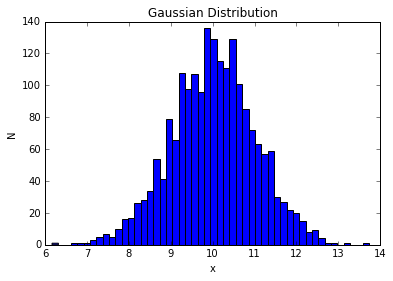

In [25]:
# Population Mean
mymean = 10
# parameter mean in gaussian distribution
mean = mymean
print ("mean = {} and std = {}".format(mean, 1.0) )

md['gaus'] = np.random.normal(loc=mean,  size=2000)
pl.hist(md['gaus'], bins = 50)
pl.title("Gaussian Distribution")
pl.xlabel("x")
pl.ylabel("N")
print ('gaus mean: {:.2f}, std: {:.2f}'.format(md['gaus'].mean(), md['gaus'].std()))

### Fig4.1: Poisson Distribution with mean = 10, std = 1, N = 2000

gaus mean: 10.01, std: 1.00


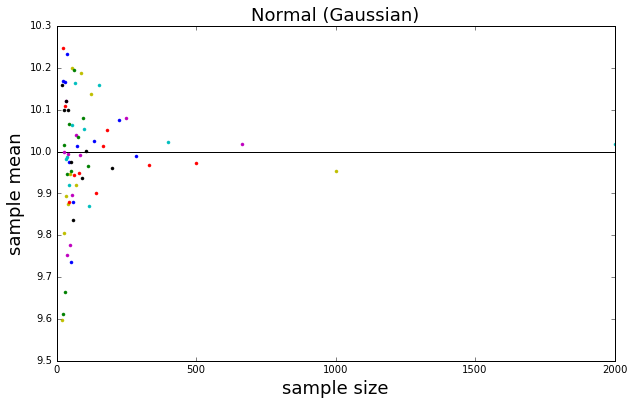

In [26]:
print ('gaus mean: {:.2f}, std: {:.2f}'.format(md['gaus'].mean(), md['gaus'].std()))

md['gaus'] = {}
size100 = (2000 / (np.array(range(1, 100)))).astype(int)

for size in size100:
    md['gaus'][size] = np.random.normal(loc=mean, size = size)
md['gaus']['means'] = {}
fig = pl.figure(figsize=(10,6)).add_subplot(111)
fig.set_ylabel('sample mean', fontsize=18)
fig.set_xlabel('sample size', fontsize=18)
fig.set_title('Normal (Gaussian)', fontsize=18)
fig.plot([0, 2000], [df, df], 'k')
for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #plot
        fig.plot(nn, md['gaus']['means'][nn], '.')

### Fig4.2:  As sample size increases, the sample mean is much more likely to be close to the population mean, with the precision increasing. It fits the core of Law of Large Number (LLN) Theorem


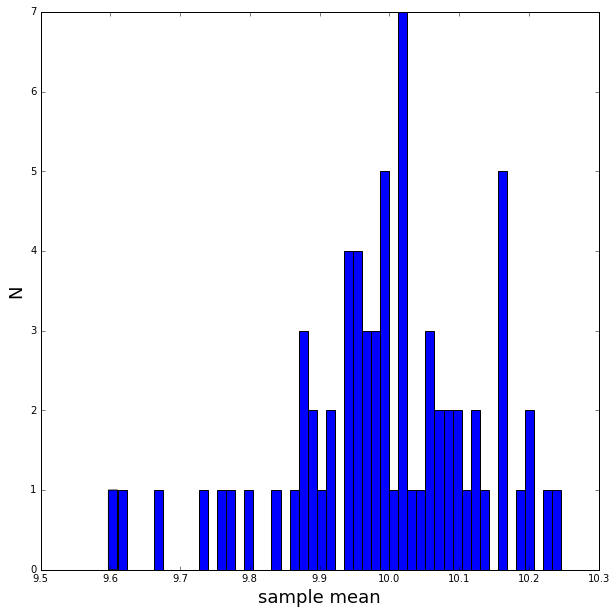

In [27]:
allmeans = list(md['gaus']['means'].values())
pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 50)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Fig4.3: The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger. In this plot, 'bell-shape' histogram of 'sample mean' shows the core of Central Limit Theorem.

<br/>
<br/>

## 5. Binomial Distribution

p = 10, n = 1.0 and n*p = mymean = 10 
binomial mean: 9.99, std: 2.23


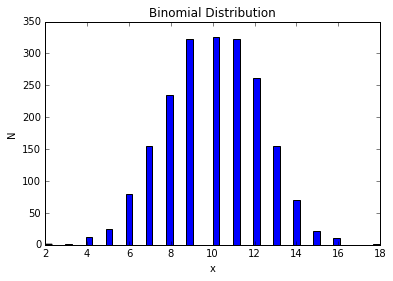

In [28]:
# Population Mean
mymean = 10
# parameter p, n in binomial distribution
p = 0.5
n=20
print ("p = {}, n = {} and n*p = mymean = 10 ".format(mean, 1.0) )

md['binomial'] = np.random.binomial(p=0.5, n=20, size=2000)
pl.hist(md['binomial'], bins = 50)
pl.title("Binomial Distribution")
pl.xlabel("x")
pl.ylabel("N")

print ('binomial mean: {:.2f}, std: {:.2f}'.format(md['binomial'].mean(), md['binomial'].std()))

### Fig5.1: Binomial Distribution, n=20, p=0.5, N = 2000

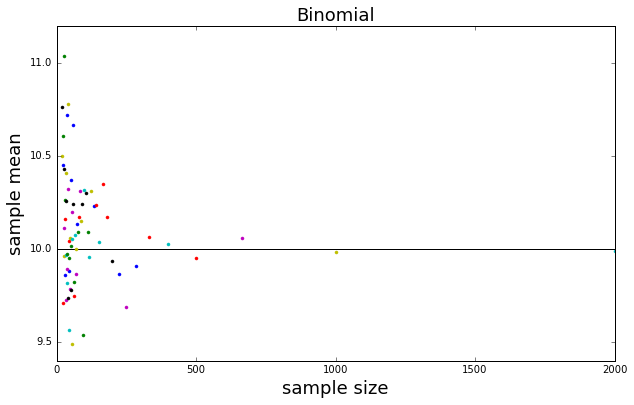

In [29]:

md['binomial'] = {}
size100 = (2000 / (np.array(range(1, 100)))).astype(int)

for size in size100:
    md['binomial'][size] = np.random.binomial(n=20, p=0.5, size = size)
md['binomial']['means'] = {}
fig = pl.figure(figsize=(10,6)).add_subplot(111)
fig.set_ylabel('sample mean', fontsize=18)
fig.set_xlabel('sample size', fontsize=18)
fig.set_title('Binomial', fontsize=18)
fig.plot([0, 2000], [df, df], 'k')
for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #plot
        fig.plot(nn, md['binomial']['means'][nn], '.')

### Fig5.2:  As sample size increases, the sample mean is much more likely to be close to the population mean, with the precision increasing. It fits the core of Law of Large Number (LLN) Theorem


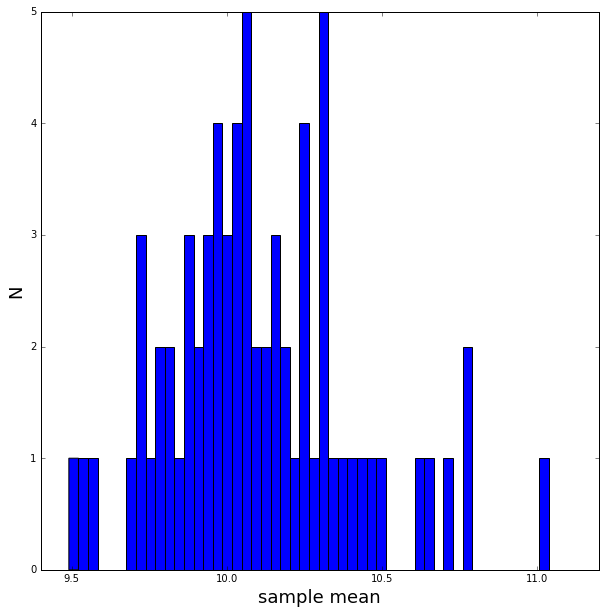

In [30]:
allmeans = list(md['binomial']['means'].values())
pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 50)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Fig5.3: The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger. In this plot, 'bell-shape' histogram of 'sample mean' shows the core of Central Limit Theorem.

<br/>
<br/>

In [31]:
allmeans=[]
for i in distributions:
    allmeans.extend(md[i]['means'].values())

In [32]:
mean = np.mean(allmeans)
std = np.std(allmeans)
print ("allmeans: mean={}, std={}".format(mean, std))

allmeans: mean=9.99821394066, std=0.692055538613


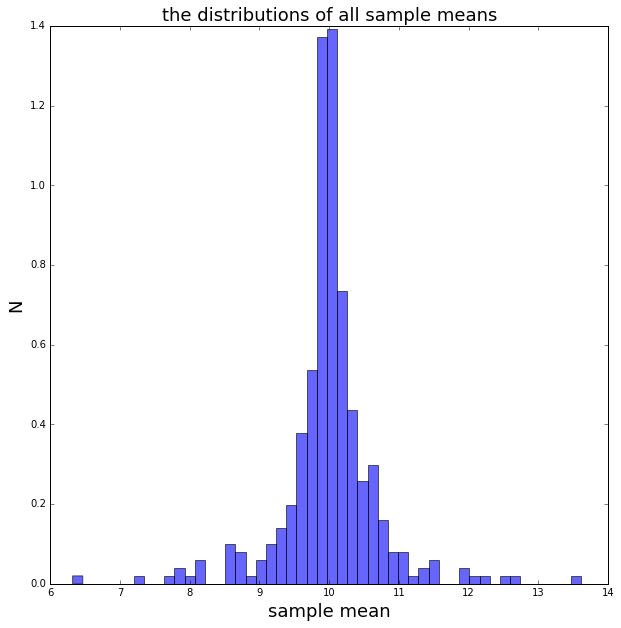

In [33]:
pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 50, alpha=0.6, normed= True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("the distributions of all sample means", fontsize=18)


### Fig6: 'Bell-shape' histogram of 'sample mean' shows the core of Central Limit Theorem


## Extra Credit

### "from scipy import stats" and use stats.norm.pdf() function

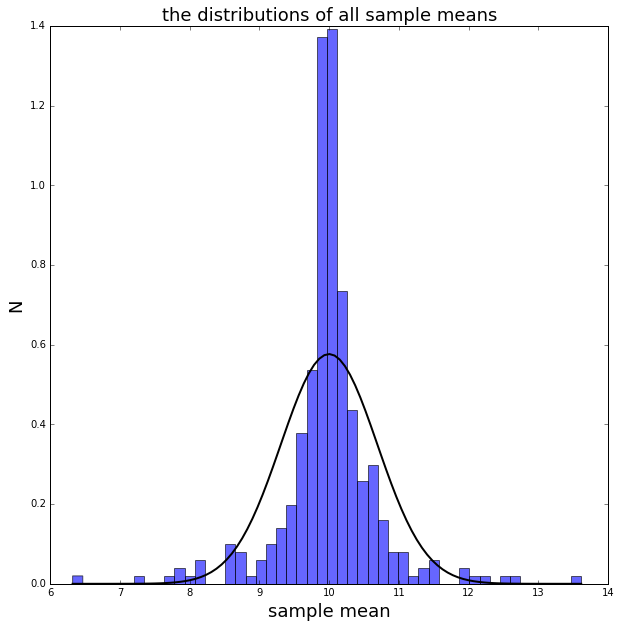

In [34]:
pl.figure(figsize = (10, 10))
pl.hist(allmeans, bins = 50, alpha=0.6, normed= True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("the distributions of all sample means", fontsize=18)

xmin, xmax = min(allmeans), max(allmeans)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
pl.plot(x, p, 'k', linewidth=2)

<br/>
<br/>
